### Setup

The First cell shows some setup work to generate example data.  This would presumably come from a netcdf file, where you would have to loop over the `(lat, lon)` indices and perform the second portion on each of them.

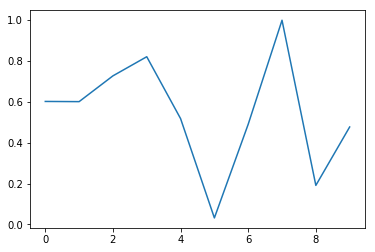

In [27]:
import numpy as np
import pandas as pd 
import xarray as xr
from matplotlib import pyplot as plt


# Make up some dates
start = pd.datetime(2000,1,1)
end = pd.datetime(2000,1,10)
dates = pd.date_range(start, end)


# Make up some data
data = np.random.rand(len(dates))

# Show the data
plt.plot(data)
plt.show()

### Doing simple disaggregation with xarray + pandas

Now that there's some data to operate on, we'll want to put it into the dataset.  The line with the commment `Fill the data in` is where the disaggregation occurs.  We add the option `ffill` to forward fill the data.  You could also use `bfill` to backwards fill.  There are also ways to fill in with interpolation, but they would require a different function call.

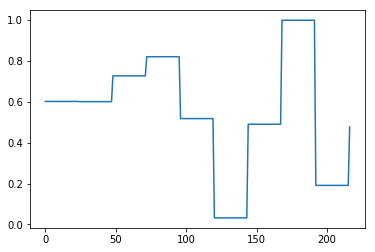

In [28]:
# Put it all in a dataframe and convert that to a dataset
df = pd.DataFrame(index=dates)
df.index.names = ['time']
df['data'] = data

# Do the reindexing
ds = xr.Dataset(df).resample("H", dim="time")

# Fill the data in
ds['data'] = ds['data'].to_dataframe().fillna(method='ffill')

# Show the filled in data
plt.plot(ds['data'])
plt.show()